### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [38]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error

array([[-0.034284  ],
       [ 0.06784993],
       [ 0.00845571],
       [ 0.06480215],
       [ 0.06517368],
       [ 0.19050438],
       [ 0.20461497],
       [ 0.16535397],
       [ 0.20862703],
       [ 0.26466306],
       [ 0.35960102],
       [ 0.34089664],
       [ 0.43240663],
       [ 0.40098803],
       [ 0.4412408 ],
       [ 0.49518386],
       [ 0.61533934],
       [ 0.42346334],
       [ 0.46333554],
       [ 0.47104972],
       [ 0.56425055],
       [ 0.60768965],
       [ 0.48761636],
       [ 0.4497395 ],
       [ 0.67649027],
       [ 0.70360098],
       [ 0.69865263],
       [ 0.80326784],
       [ 0.72964775],
       [ 0.60105839],
       [ 0.92133232],
       [ 0.87695296],
       [ 0.83319605],
       [ 0.7409009 ],
       [ 0.91385228],
       [ 0.77969967],
       [ 1.08183749],
       [ 0.80780986],
       [ 0.75663058],
       [ 0.72959822],
       [ 0.88265219],
       [ 0.99268029],
       [ 0.96493035],
       [ 0.99925946],
       [ 0.99840496],
       [ 0

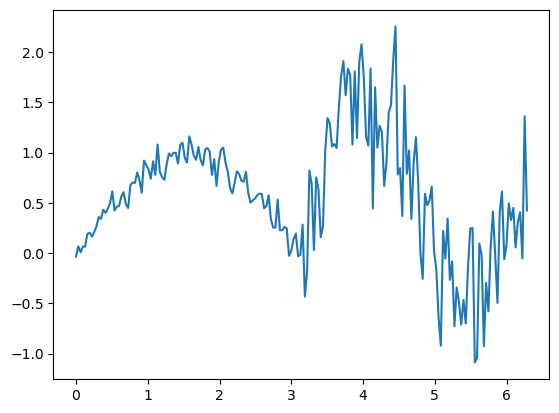

In [39]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 100

    x = np.zeros( 2 * n)

        # generate time
    t = np.linspace(0, 2*np.pi, 2 * n)
    t1=t[0:n]
    t2=t[n:2*n]

    # generate spatially inhomogenous data
    x[0:n] = np.sin(t1) + np.random.normal(0, 0.1, n)
    x[n:2*n] = np.sin(2*t2) + np.random.normal(0, 0.45, n)+0.5



    return x, t
    

x,t=generate_spatially_inhomogenous_data()

plt.plot(t,x)

x=x.reshape(-1,1)
x


In [40]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,25,5)

Performing  0 out of 5 iterations of cross validation
Performing cross validation for lambda = 3.089886740513978e-05
Performing cross validation for lambda = 6.656959182032855e-05
Performing cross validation for lambda = 0.00014341983791897877
Performing cross validation for lambda = 0.0003089886740513978
Performing cross validation for lambda = 0.0006656959182032855
Performing cross validation for lambda = 0.0014341983791897846
Performing cross validation for lambda = 0.003089886740513978
Performing cross validation for lambda = 0.006656959182032855
Performing cross validation for lambda = 0.014341983791897847
Performing cross validation for lambda = 0.030898867405139783
Performing cross validation for lambda = 0.06656959182032855
Performing cross validation for lambda = 0.14341983791897847
Performing cross validation for lambda = 0.30898867405139785
Performing cross validation for lambda = 0.6656959182032856
Performing cross validation for lambda = 1.4341983791897848
Performing cross

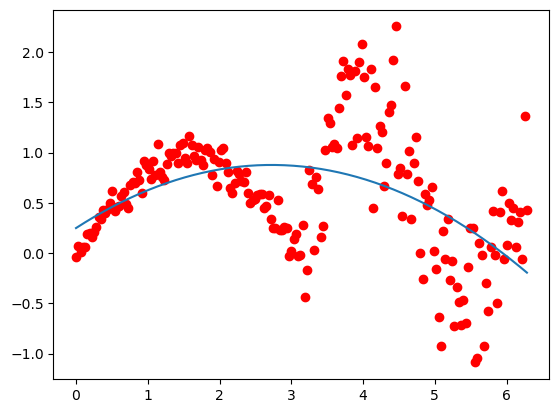

In [41]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution')
plt.scatter(t,x,label='data',color='red')


In [42]:
compute_error(x,sol)

0.2875020049785184

In [43]:
prior=np.concatenate((1.25*np.ones(100),np.ones(100)))

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

array([[ 1.25, -3.75,  3.75, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.25, -3.75, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.25, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  3.  , -1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -3.  ,  3.  , -1.  ]])

In [44]:

best_lambda=cross_validation(x,D,25,5)

Performing  0 out of 5 iterations of cross validation
Performing cross validation for lambda = 2.6601856593548255e-05
Performing cross validation for lambda = 5.7311962664393717e-05
Performing cross validation for lambda = 0.00012347488051798214
Performing cross validation for lambda = 0.00026601856593548253
Performing cross validation for lambda = 0.0005731196266439371
Performing cross validation for lambda = 0.0012347488051798188
Performing cross validation for lambda = 0.0026601856593548253
Performing cross validation for lambda = 0.0057311962664393715
Performing cross validation for lambda = 0.01234748805179819
Performing cross validation for lambda = 0.026601856593548256
Performing cross validation for lambda = 0.05731196266439372
Performing cross validation for lambda = 0.12347488051798187
Performing cross validation for lambda = 0.26601856593548256
Performing cross validation for lambda = 0.5731196266439372
Performing cross validation for lambda = 1.2347488051798188
Performing c

In [45]:
best_lambda

2910.6012695085196

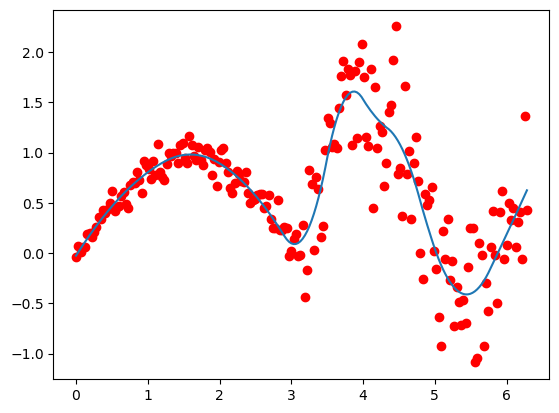

In [46]:
results=adaptive_tf(x,D,10)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution')
plt.scatter(t,x,label='data',color='red')


In [14]:
compute_error(x,sol)

0.058122209635608976